<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#IMPORTS" data-toc-modified-id="IMPORTS-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>IMPORTS</a></span></li><li><span><a href="#READ-FEATHER-/-Continue-Data-Quality-&amp;-Data-Insight-Gathering" data-toc-modified-id="READ-FEATHER-/-Continue-Data-Quality-&amp;-Data-Insight-Gathering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>READ FEATHER / Continue Data Quality &amp; Data Insight Gathering</a></span><ul class="toc-item"><li><span><a href="#Continue-Data-Quality-Checks" data-toc-modified-id="Continue-Data-Quality-Checks-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Continue Data Quality Checks</a></span><ul class="toc-item"><li><span><a href="#Inspect-Dataframe-Null-Values" data-toc-modified-id="Inspect-Dataframe-Null-Values-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Inspect Dataframe Null Values</a></span></li><li><span><a href="#Inspect-most-and-least-frequently-appearing-values-for-each-feature" data-toc-modified-id="Inspect-most-and-least-frequently-appearing-values-for-each-feature-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Inspect most and least frequently appearing values for each feature</a></span></li><li><span><a href="#Examine-trip_id-Closer" data-toc-modified-id="Examine-trip_id-Closer-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Examine trip_id Closer</a></span></li><li><span><a href="#Describe-Continuous-Features" data-toc-modified-id="Describe-Continuous-Features-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Describe Continuous Features</a></span></li><li><span><a href="#Plot-value-distributions-for-the-numeric-(–-ultimately-temporal–)-features" data-toc-modified-id="Plot-value-distributions-for-the-numeric-(–-ultimately-temporal–)-features-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Plot value distributions for the numeric (– ultimately temporal–) features</a></span></li><li><span><a href="#Check-Trip-Time-Correctness" data-toc-modified-id="Check-Trip-Time-Correctness-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Check Trip Time Correctness</a></span></li><li><span><a href="#Visualise-+-Describe-Categorical-Features" data-toc-modified-id="Visualise-+-Describe-Categorical-Features-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>Visualise + Describe Categorical Features</a></span></li><li><span><a href="#Trips-continuing-after-Midnight" data-toc-modified-id="Trips-continuing-after-Midnight-2.1.8"><span class="toc-item-num">2.1.8&nbsp;&nbsp;</span>Trips continuing after Midnight</a></span></li><li><span><a href="#Non-represented-Days" data-toc-modified-id="Non-represented-Days-2.1.9"><span class="toc-item-num">2.1.9&nbsp;&nbsp;</span>Non-represented Days</a></span></li><li><span><a href="#Export-set-of-Trip_ids-for-use-in-comparing-with-rt_leavetimes" data-toc-modified-id="Export-set-of-Trip_ids-for-use-in-comparing-with-rt_leavetimes-2.1.10"><span class="toc-item-num">2.1.10&nbsp;&nbsp;</span>Export set of Trip_ids for use in comparing with rt_leavetimes</a></span></li><li><span><a href="#Plot-Trips-Frequency" data-toc-modified-id="Plot-Trips-Frequency-2.1.11"><span class="toc-item-num">2.1.11&nbsp;&nbsp;</span>Plot Trips Frequency</a></span><ul class="toc-item"><li><span><a href="#Plot-Trips-frequency-by-day-of-the-week-and-month" data-toc-modified-id="Plot-Trips-frequency-by-day-of-the-week-and-month-2.1.11.1"><span class="toc-item-num">2.1.11.1&nbsp;&nbsp;</span>Plot Trips frequency by day of the week and month</a></span></li></ul></li><li><span><a href="#Add-Exploratory-Feature:-Hour-of-Day-Departure-Time" data-toc-modified-id="Add-Exploratory-Feature:-Hour-of-Day-Departure-Time-2.1.12"><span class="toc-item-num">2.1.12&nbsp;&nbsp;</span>Add Exploratory Feature: Hour of Day Departure Time</a></span></li></ul></li></ul></li><li><span><a href="#Export-this-version-of-dataset" data-toc-modified-id="Export-this-version-of-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Export this version of dataset</a></span></li><li><span><a href="#Export-Line145-for-Test-Modelling" data-toc-modified-id="Export-Line145-for-Test-Modelling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Export Line145 for Test Modelling</a></span></li><li><span><a href="#REIMPORT-FOR-FURTHER-INSIGHTS" data-toc-modified-id="REIMPORT-FOR-FURTHER-INSIGHTS-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>REIMPORT FOR FURTHER INSIGHTS</a></span><ul class="toc-item"><li><span><a href="#PLANNED-MAX-TRAVEL-TIMES-FOR-EACH-LINE" data-toc-modified-id="PLANNED-MAX-TRAVEL-TIMES-FOR-EACH-LINE-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>PLANNED MAX TRAVEL TIMES FOR EACH LINE</a></span></li></ul></li></ul></div>

One Trip

# IMPORTS

In [4]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:90% !important;}</style>'))

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import csv

In [3]:
# Display plots in the notebook
%matplotlib inline

In [4]:
def assess_df(df):
  
    # declare the feature types in the dataframe.
    # this adds dynamism to the function, whereby it can check
    # for constant columns on a dtype-amended or non-amended
    # dataframe.
    # Applicable for constant column check below

    feature_types = {df[df.columns[x]].dtypes.name for x in range(len(df.columns))}
    
  	# print datatypes
  
    print("Datatypes:\n")
    print(df.dtypes)
    print('\n\n')
    
    # print number rows and cols
    print('*' * 50)
    print('ROWS, COLUMNS, NULLS\n')
    print(df.shape[0], "rows in the dataframe.")
    print(df.shape[1], "columns in the dataframe.\n")
    print(df.isnull().sum().sum(), "null values in the dataframe.")
    
    # check duplicate rows & col; print if present
    
    duplicate_rows = df.duplicated(keep=False).sum()
    duplicate_cols = df.index.T.duplicated(keep=False).sum()
    
    print(duplicate_rows, "duplicate rows")
    print(duplicate_cols, "duplicate columns")
    
    if duplicate_rows > 0 or duplicate_cols > 0:
      print(df.loc[df.duplicated()])
	
    print('\n')
    
    
    # check for constant columns
    # form lists of numeric and categorical columns
    
    numeric_cols = list(df.select_dtypes(include=[np.number]).columns.values)
    categorical_cols = list(df.select_dtypes('category').columns.values)
    
    # generate list of standard deviations for each numeric feature
    # a standard deviation of 0 indicates a constant numeric column.
    
    standard_diffs = [df.describe().loc['std', x] for x in numeric_cols]
    
    
    # for each categorical column, check whether the feature has
    # a unique value of 1. if yes, indicates a constant column
    
    constant_categorical_column=False
    if 'category' in feature_types:
        for column in categorical_cols:
            if df[column].describe().index.unique == 1:
                constant_categorical_column = True
    
    # print the results of checking for constant columns
    # for both continuous and categorical features
            
    if 0 in standard_diffs:
        print("Constant numeric columns: TRUE")
    else:
        print("Constant numeric columns: FALSE")
  
    if 'category' in feature_types:    
        if constant_categorical_column == True:
            print("Constant categorical columns: TRUE")
        else:
            print("Constant categorical columns: FALSE")

            
    
    print('\n\n')

    
    # feature stats
    print('*' * 50)
    print('DESCRIPTION\n')
    print(df.describe().T)
    print('\n\n')
    print('*' * 50)

    
    # feature stats: categorical
    
    if 'category' in feature_types:
        print('CATEGORICAL DESCRIPTION\n')
        print('\n')
        print(df.select_dtypes(['category']).describe().T)
        print('\n\n')
        print('*' * 50)
    
    # print feature cardinalities
    
    print("FEATURE CARDINALITIES\n")
    column_names = list(df.columns.values)

    print('{0:45}  {1}'.format("Feature", "Distinct Values"))
    print('{0:45}  {1}'.format("-------", "--------------- \n"))

    for c in column_names:
        print('{0:45}  {1}'.format(c, str(len(df[c].unique()))))
    
    print('\n')
    print('*' * 50)
    print('MEMORY\n')
    
    
    print(df.info(memory_usage='deep'))
    print('\n')
    print(df.memory_usage(deep=True))
    print('\n')
    print('*' * 50)
    print('HEAD\n')
    print(df.head(10))
    print('\n')
    print('*' * 50)
    print('TAIL\n')
    print(df.tail(10))

# READ FEATHER / Continue Data Quality & Data Insight Gathering

In [5]:
df = pd.read_feather('/tmp/ssh_mount/rt_trips/020719_postassessquality_wNaNs_trips.feather')

In [6]:
df.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,LASTUPDATE
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,2018-02-28 12:05:11
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,2018-02-28 12:05:11
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,2018-02-28 12:05:11
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,2018-02-28 12:05:11
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,2018-02-28 12:05:11


In [7]:
df.drop('LASTUPDATE', axis=1, inplace=True)

In [8]:
df.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0


## Continue Data Quality Checks

In [9]:
df.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0


In [10]:
assess_df(df)

Datatypes:

DAYOFSERVICE       datetime64[ns]
TRIPID                   category
LINEID                   category
ROUTEID                  category
DIRECTION                category
PLANNEDTIME_ARR             int32
PLANNEDTIME_DEP             int32
ACTUALTIME_ARR            float32
ACTUALTIME_DEP            float32
dtype: object



**************************************************
ROWS, COLUMNS, NULLS

2182637 rows in the dataframe.
9 columns in the dataframe.

301758 null values in the dataframe.
0 duplicate rows
0 duplicate columns


Constant numeric columns: FALSE
Constant categorical columns: FALSE



**************************************************
DESCRIPTION

                     count          mean           std      min      25%  \
PLANNEDTIME_ARR  2182637.0  55078.747653  17424.822304  18203.0  39683.0   
PLANNEDTIME_DEP  2182637.0  51533.292820  17571.637274  16200.0  36000.0   
ACTUALTIME_ARR   2045430.0  55036.992188  17329.863281  17546.0  39668.0   
ACTUALTIME_DEP   

### Inspect Dataframe Null Values

In [11]:
features = df.columns 

In [12]:
# check the number of nulls for each feature
# and check what percentage these represent
# of the total values for that feature

for feature in features:
    number_nulls = df.loc[:, feature].isnull().sum()
    print(feature, "---", number_nulls, "nulls –––", round(number_nulls / len(df) * 100, 3), "% rows affected")

DAYOFSERVICE --- 0 nulls ––– 0.0 % rows affected
TRIPID --- 0 nulls ––– 0.0 % rows affected
LINEID --- 0 nulls ––– 0.0 % rows affected
ROUTEID --- 0 nulls ––– 0.0 % rows affected
DIRECTION --- 0 nulls ––– 0.0 % rows affected
PLANNEDTIME_ARR --- 0 nulls ––– 0.0 % rows affected
PLANNEDTIME_DEP --- 0 nulls ––– 0.0 % rows affected
ACTUALTIME_ARR --- 137207 nulls ––– 6.286 % rows affected
ACTUALTIME_DEP --- 164551 nulls ––– 7.539 % rows affected


In [13]:
# check whether the nulls in these columns
# account for all the dataframe's nulls.

df.ACTUALTIME_ARR.isnull().sum() + df.ACTUALTIME_DEP.isnull().sum()\
== df.isnull().sum().sum()

True

### Inspect most and least frequently appearing values for each feature

In [14]:
# print top values for each feature

for feature in features:
    print(feature)
    print(df[feature].dtype, "\n")
    print(df[feature].value_counts().nlargest(10),"\n\n")

DAYOFSERVICE
datetime64[ns] 

2018-02-12    7122
2018-02-19    7121
2018-04-17    7118
2018-02-20    7111
2018-01-30    7099
2018-02-02    7098
2018-03-20    7098
2018-02-06    7097
2018-04-09    7094
2018-04-10    7093
Name: DAYOFSERVICE, dtype: int64 


TRIPID
category 

7324685    19
7323295    19
7316504    19
7316505    19
7323419    19
7323417    19
7323411    19
7323410    19
7323407    19
7323406    19
Name: TRIPID, dtype: int64 


LINEID
category 

46A    76728
145    62730
15     58083
40     56974
39A    55301
130    54301
27     51023
123    48917
16     48628
9      43613
Name: LINEID, dtype: int64 


ROUTEID
category 

46A_74     37182
46A_67     35759
145_102    29259
15_17      28471
145_105    27964
40_31      27809
39A_43     27669
130_11     27516
40_27      27106
130_10     26785
Name: ROUTEID, dtype: int64 


DIRECTION
category 

2    1100273
1    1082364
Name: DIRECTION, dtype: int64 


PLANNEDTIME_ARR
int32 

31620    467
26400    425
65880    402
59700    400
32

In [15]:
# print bottom value for each feature

for feature in features:
    print(feature)
    print(df[feature].dtype, "\n")
    print(df[feature].value_counts().nsmallest(10),"\n\n")

DAYOFSERVICE
datetime64[ns] 

2018-03-03    1901
2018-10-28    3478
2018-03-04    3520
2018-12-26    3543
2018-10-14    3550
2018-08-26    3554
2018-12-30    3557
2018-12-02    3559
2018-10-07    3570
2018-12-23    3571
Name: DAYOFSERVICE, dtype: int64 


TRIPID
category 

6099439    1
6100002    1
6099440    1
6278970    1
6588242    1
6100003    1
6278737    1
6278736    1
6100004    1
6099671    1
Name: TRIPID, dtype: int64 


LINEID
category 

33E     14
41D     36
16D     84
51X    238
77X    243
68X    243
118    343
31D    357
70D    360
42D    360
Name: LINEID, dtype: int64 


ROUTEID
category 

33D_76      2
14C_10      4
41X_131     4
41B_58      5
140_16      5
41X_119     7
41_25       7
41_24       9
33B_60      9
83_29      10
Name: ROUTEID, dtype: int64 


DIRECTION
category 

1    1082364
2    1100273
Name: DIRECTION, dtype: int64 


PLANNEDTIME_ARR
int32 

24481    1
80899    1
33136    1
80951    1
29034    1
77923    1
83231    1
84451    1
56622    1
23569    1
Name

Results:
    
- There are between 1 and 19 entries for a given trip_id. What is the meaning of trip_id?
- Some line_id and route_id values are extrememly infrequent (e.g. 33E has 14 occurrences, whereas 46a has 76728 occurrences)

### Examine trip_id Closer

Firstly look at multiple occurrences of trip_id in the table

In [16]:
# look at a rows where trip id occurs more than once

df.loc[df.TRIPID == 7324685, :].sort_values(by='DAYOFSERVICE')

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
182940,2018-07-30,7324685,140,140_21,2,58348,54900,58887.0,54939.0
958963,2018-07-31,7324685,140,140_21,2,58348,54900,58919.0,54878.0
1326273,2018-08-01,7324685,140,140_21,2,58348,54900,59202.0,54901.0
1281918,2018-08-02,7324685,140,140_21,2,58348,54900,NaN,54951.0
402400,2018-08-03,7324685,140,140_21,2,58348,54900,58783.0,54889.0
730632,2018-08-07,7324685,140,140_21,2,58348,54900,58986.0,54909.0
1225649,2018-08-08,7324685,140,140_21,2,58348,54900,60123.0,54910.0
274923,2018-08-09,7324685,140,140_21,2,58348,54900,59343.0,54890.0
1981294,2018-08-10,7324685,140,140_21,2,58348,54900,59411.0,NaN
2060750,2018-08-13,7324685,140,140_21,2,58348,54900,NaN,54917.0


In [17]:
# df.loc[df.TRIPID == 7324685, :].sort_values(by='DAYOFSERVICE').to_csv('./table.csv')

In [18]:
# look at another set of rows where trip id occurs more than once

df.loc[df.TRIPID == 7323295, :].sort_values(by='DAYOFSERVICE')

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
180648,2018-07-30,7323295,18,18_4,2,27271,24300,27319.0,24300.0
957501,2018-07-31,7323295,18,18_4,2,27271,24300,27342.0,NaN
1323662,2018-08-01,7323295,18,18_4,2,27271,24300,27336.0,24303.0
1280465,2018-08-02,7323295,18,18_4,2,27271,24300,27406.0,24398.0
403436,2018-08-03,7323295,18,18_4,2,27271,24300,27598.0,24329.0
729197,2018-08-07,7323295,18,18_4,2,27271,24300,27356.0,NaN
1223020,2018-08-08,7323295,18,18_4,2,27271,24300,27150.0,24312.0
263350,2018-08-09,7323295,18,18_4,2,27271,24300,27387.0,24312.0
601790,2018-08-10,7323295,18,18_4,2,27271,24300,27107.0,24298.0
582558,2018-08-13,7323295,18,18_4,2,27271,24300,27433.0,24448.0


Result: There are 360 days of service in the dataset. Here, in each case, a particular trip_id is represented 19 times, on temporally close dates.

In [19]:
# find a non-repeated trip_id
# this is for use in the leavetimes dataset
# examination

df.loc[~df.TRIPID.duplicated(keep=False), 'TRIPID'].tolist()[0]

6271460

In [20]:
# check the above cell gives the right result

df.loc[df.TRIPID == 6267386, :].sort_values(by='DAYOFSERVICE')

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
150,2018-02-18,6267386,145,145_102,1,58497,54000,58711.0,53932.0


In [21]:
# find a trip_id represented in the middle cardinality range: 9

pd.DataFrame(df.loc[df.TRIPID.value_counts().values == 9, :].iloc[0,:]).T

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
45568,2018-10-16 00:00:00,8026357,26,26_29,2,50014,48300,NaN,48257


In [22]:
# show the instances of this trip_id

df.loc[df.TRIPID == 8026357, :].sort_values(by='DAYOFSERVICE')

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
1184813,2018-10-08,8026357,26,26_29,2,50014,48300,50335.0,48272.0
1196990,2018-10-09,8026357,26,26_29,2,50014,48300,50236.0,48243.0
10742,2018-10-10,8026357,26,26_29,2,50014,48300,50230.0,48244.0
3947,2018-10-11,8026357,26,26_29,2,50014,48300,50122.0,48273.0
105626,2018-10-12,8026357,26,26_29,2,50014,48300,NaN,48317.0
602760,2018-10-15,8026357,26,26_29,2,50014,48300,50566.0,48316.0
45568,2018-10-16,8026357,26,26_29,2,50014,48300,NaN,48257.0
2041234,2018-10-17,8026357,26,26_29,2,50014,48300,50324.0,48254.0
1965571,2018-10-18,8026357,26,26_29,2,50014,48300,NaN,48346.0
749378,2018-10-19,8026357,26,26_29,2,50014,48300,NaN,48290.0


Result: instances in this case are also temporally close together

### Describe Continuous Features

In [23]:
df.loc[:, df.dtypes != 'category'].describe().to_csv('./trips_continuous_desc.csv')

### Plot value distributions for the numeric (– ultimately temporal–) features

<Figure size 432x288 with 0 Axes>

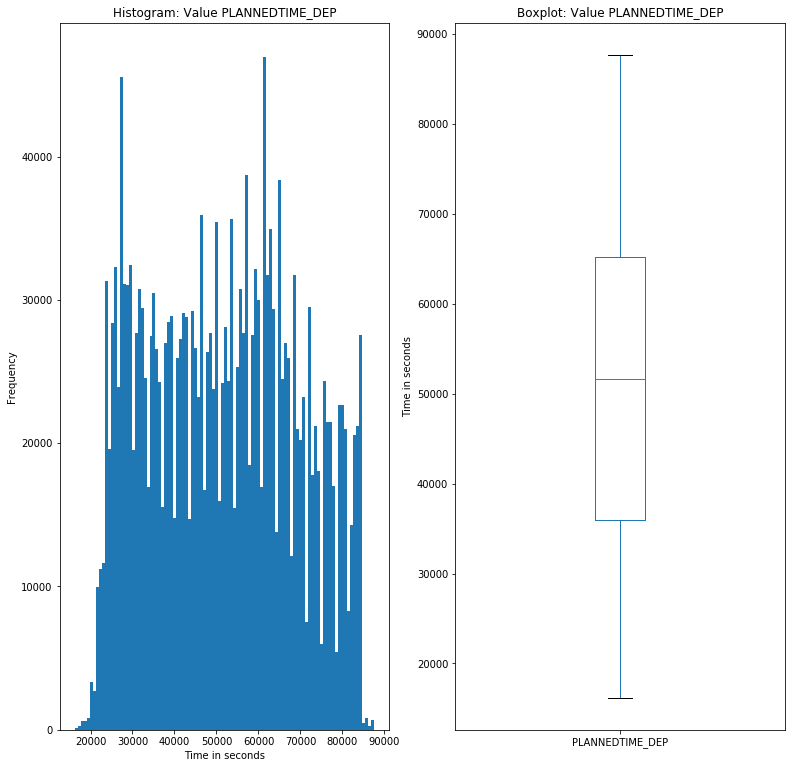

In [24]:
plt.figure()

fig, axes = plt.subplots(1, 2)

axes[0].set_xlabel("Time in seconds")
axes[0].set_ylabel("Number Occurrences")

axes[1].set_ylabel("Time in seconds")

axes[0].title.set_text('Histogram: Value PLANNEDTIME_DEP')
axes[1].title.set_text('Boxplot: Value PLANNEDTIME_DEP')

df.PLANNEDTIME_DEP.sort_values().plot(kind='hist',\
        ax=axes[0], figsize=(13,13), bins=100)

df.PLANNEDTIME_DEP.sort_values().plot(kind='box',\
        ax=axes[1], figsize=(13,13))

plt.savefig("Histogram+Boxplt_PLANNEDTIME_DEP")

<Figure size 432x288 with 0 Axes>

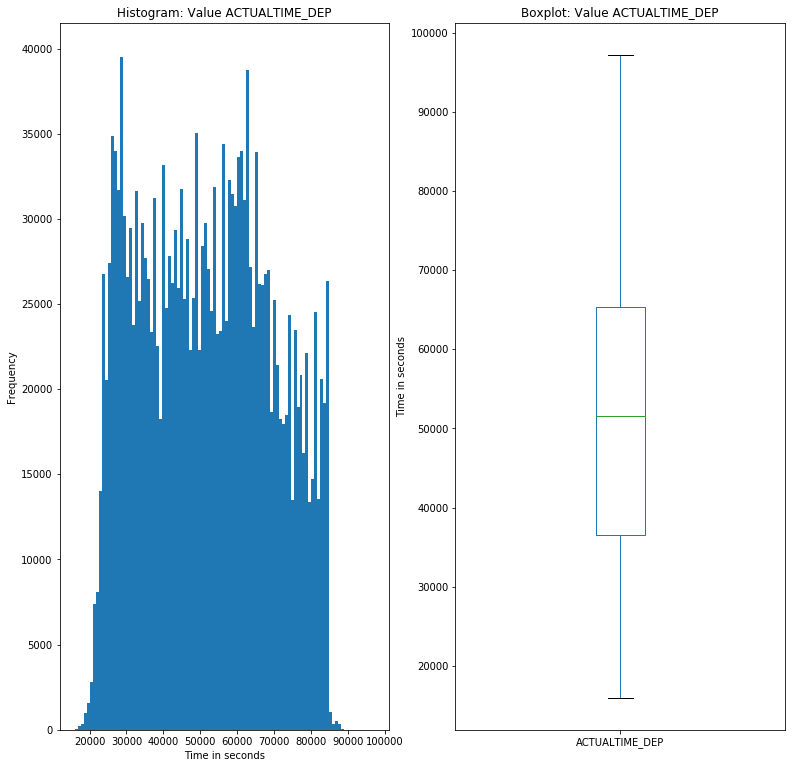

In [25]:
plt.figure()

fig, axes = plt.subplots(1, 2)

axes[0].set_xlabel("Time in seconds")

axes[1].set_ylabel("Time in seconds")

axes[0].title.set_text('Histogram: Value ACTUALTIME_DEP')
axes[1].title.set_text('Boxplot: Value ACTUALTIME_DEP')

df.ACTUALTIME_DEP.sort_values().plot(kind='hist',\
                ax=axes[0], figsize=(13,13),bins=100)

df.ACTUALTIME_DEP.sort_values().plot(kind='box',\
                ax=axes[1], figsize=(13,13))

plt.savefig('Histogram+Boxplt_ACTUALTIME_DEP')

<Figure size 432x288 with 0 Axes>

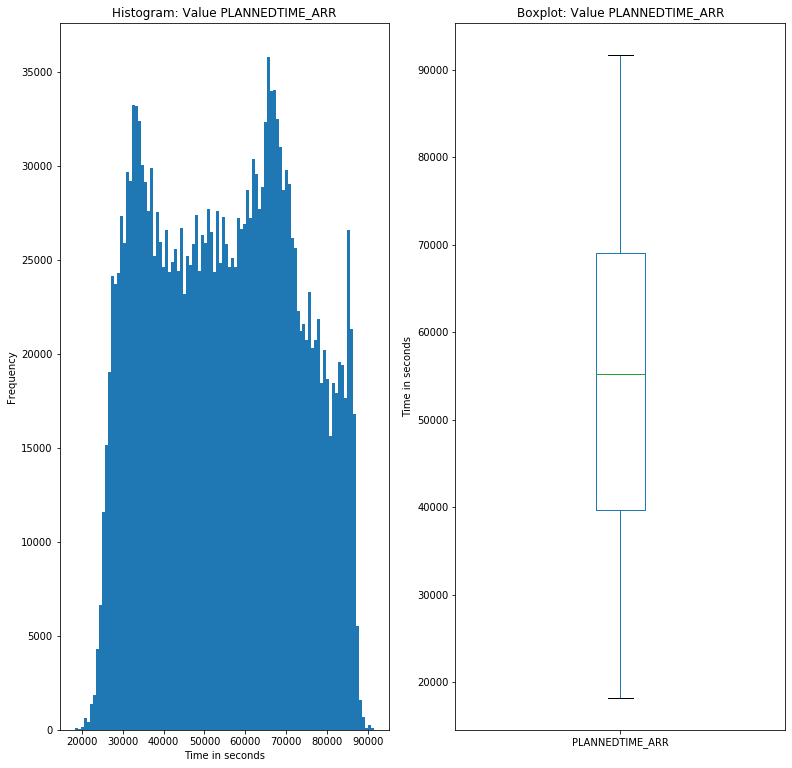

In [26]:
plt.figure()

fig, axes = plt.subplots(1, 2)

axes[0].set_xlabel("Time in seconds")

axes[1].set_ylabel("Time in seconds")

axes[0].title.set_text('Histogram: Value PLANNEDTIME_ARR')
axes[1].title.set_text('Boxplot: Value PLANNEDTIME_ARR')

df.PLANNEDTIME_ARR.sort_values().plot(kind='hist',\
                    ax=axes[0], figsize=(13,13),bins=100)

df.PLANNEDTIME_ARR.sort_values().plot(kind='box',\
                    ax=axes[1], figsize=(13,13))

plt.savefig('Histogram+Boxplt_PLANNEDTIME_ARR')

<Figure size 432x288 with 0 Axes>

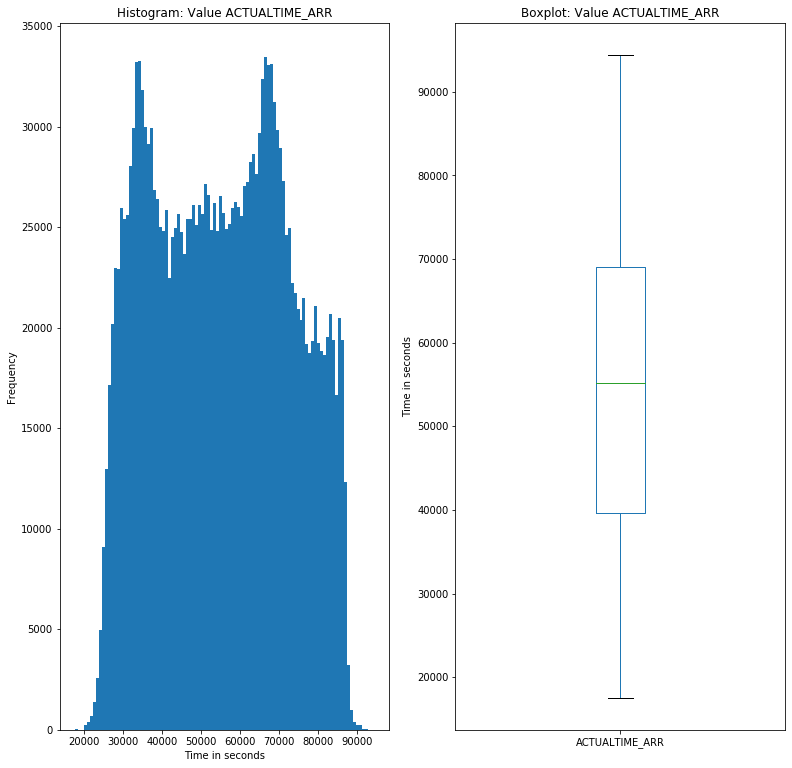

In [27]:
plt.figure()

fig, axes = plt.subplots(1, 2)

axes[0].set_xlabel("Time in seconds")

axes[1].set_ylabel("Time in seconds")

axes[0].title.set_text('Histogram: Value ACTUALTIME_ARR')
axes[1].title.set_text('Boxplot: Value ACTUALTIME_ARR')

df.ACTUALTIME_ARR.sort_values().plot(kind='hist',\
                ax=axes[0], figsize=(13,13),bins=100)

df.ACTUALTIME_ARR.sort_values().plot(kind='box',\
                ax=axes[1], figsize=(13,13))

plt.savefig('Histogram+Boxplt_ACTUALTIME_ARR')

### Check Trip Time Correctness

In [28]:
trip_times = pd.Series(df.ACTUALTIME_ARR - df.ACTUALTIME_DEP)

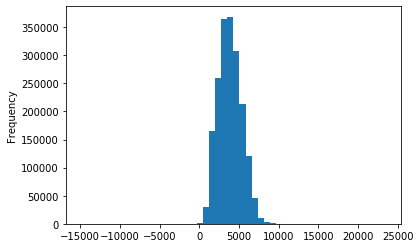

In [29]:
plt.figure()
trip_times.dropna().plot(kind='hist', bins=50)
plt.savefig('actual_trips_histogram')

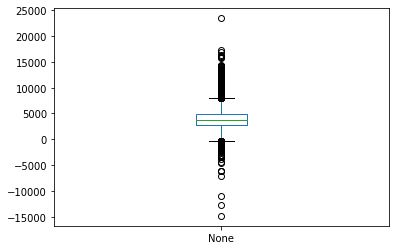

In [30]:
plt.figure()
trip_times.dropna().plot(kind='box')
plt.savefig('actual_trips_boxplot')

In [31]:
# The number of trip times with a negative number

trip_times.loc[trip_times < 0].shape[0]

103

In [32]:
print(df.iloc[1619, [7,8]].T)
print("\n\n")
print(trip_times.loc[trip_times < 0].head(1))

ACTUALTIME_ARR    76232
ACTUALTIME_DEP    83371
Name: 1619, dtype: object



1619   -7139.0
dtype: float32


In [33]:
trip_times.dropna(inplace=True)

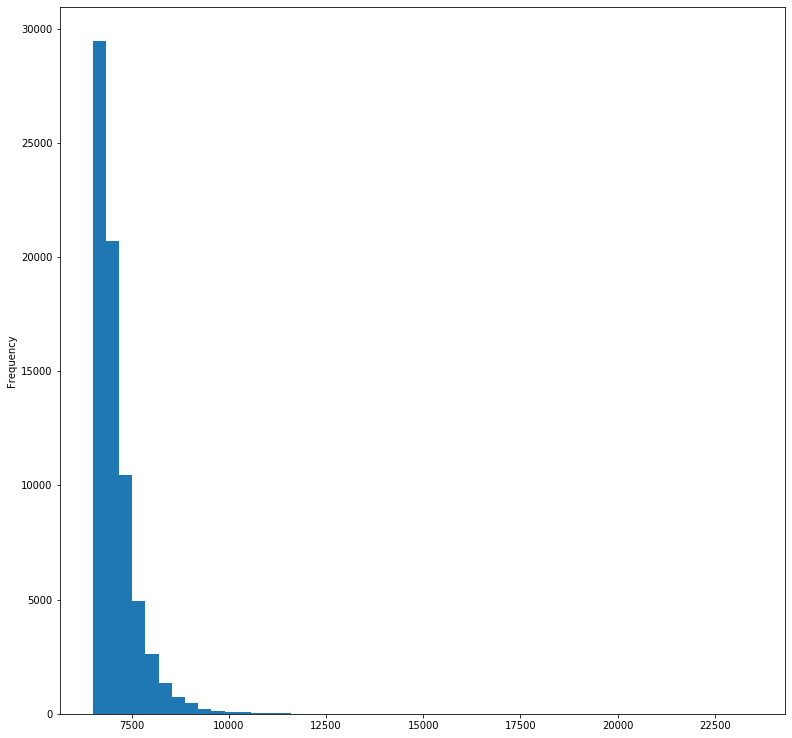

In [34]:
trip_times.loc[trip_times > 6500].plot(kind='hist', bins=50, figsize=(13,13))

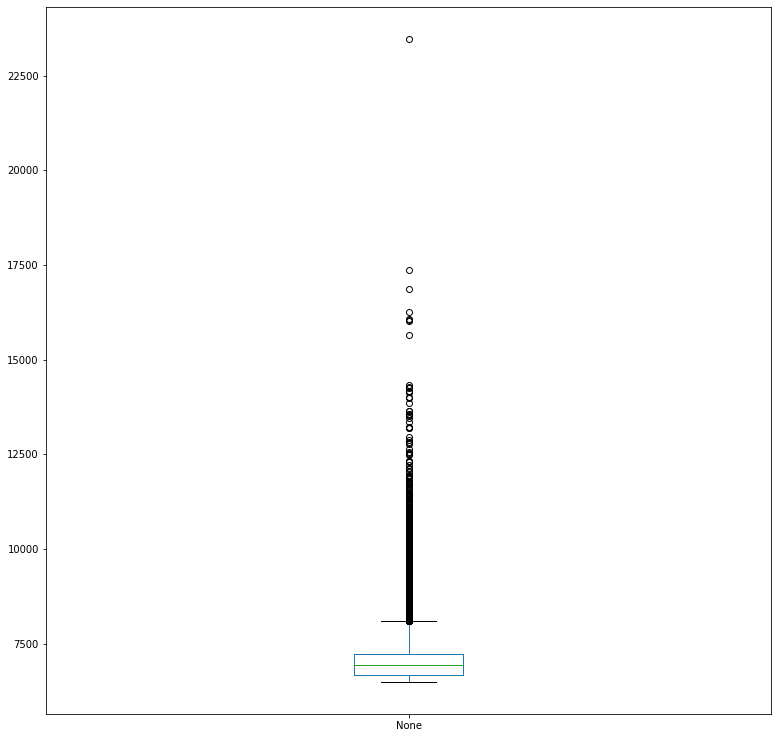

In [35]:
trip_times.loc[trip_times > 6500].plot(kind='box', figsize=(13,13))

In [36]:
%%capture
plt.figure()
trip_times.loc[trip_times > 6500].plot(kind='box', figsize=(5,5))
plt.savefig('actual_triptimes_outliers')

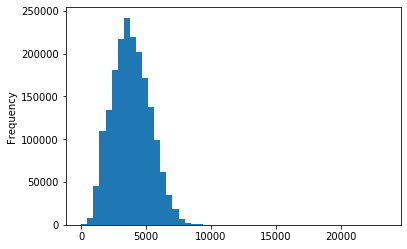

In [37]:
# view the distribution without the negative outliers

trip_times.loc[trip_times >= 0].plot(kind='hist', bins=50)

Compare With Planned Times

In [38]:
planned_trip_times = pd.Series(df.PLANNEDTIME_ARR - df.PLANNEDTIME_DEP)

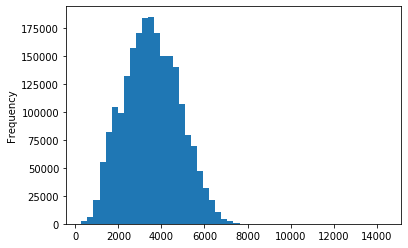

In [39]:
planned_trip_times.dropna().plot(kind='hist', bins=50)

In [40]:
# the number of planned trip times with the above error

planned_trip_times.loc[planned_trip_times < 0].shape[0]

0

### Visualise + Describe Categorical Features

In [41]:
df.loc[:, df.dtypes == 'category'].describe().T

,count,unique,top,freq
TRIPID,2182637,658964,7324685,19
LINEID,2182637,130,46A,76728
ROUTEID,2182637,588,46A_74,37182
DIRECTION,2182637,2,2,1100273


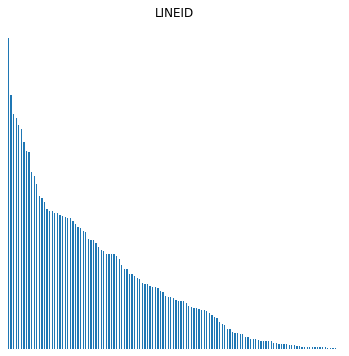

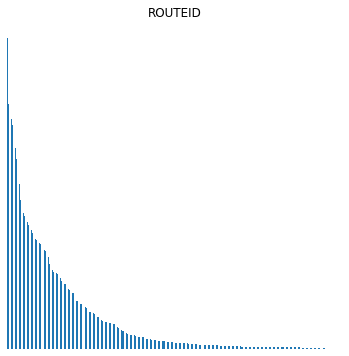

In [42]:
pp = PdfPages("categorical_barcharts.pdf")
for x in ['LINEID', 'ROUTEID']:
    plt.xlabel(x + " as a spectrum")
    plt.axis('off')
    plt.ylabel("Frequency")
    p = df[x].value_counts(sort=True).plot(kind='bar', title=x, figsize=(6,6))
    pp.savefig(p.get_figure())
    plt.show()
pp.close()

Result: Some routes and some lines occur more frequently than others in the dataset.

In [43]:
# duration of dataset

df.DAYOFSERVICE.max() - df.DAYOFSERVICE.min()

Timedelta('364 days 00:00:00')

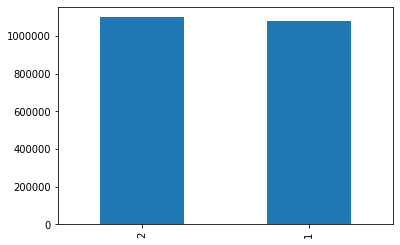

In [44]:
plt.figure()
df.DIRECTION.value_counts().plot(kind='bar')
plt.savefig('direction_value_count_barchart')

### Trips continuing after Midnight

In [45]:
df.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0


In [46]:
seconds_in_day = 24 * 60 * 60

In [47]:
# number of trips PLANNED to finish after midnight on the day of service

df.loc[df.PLANNEDTIME_ARR > seconds_in_day].shape[0]

29351

In [48]:
# number of trips that actually finished after midnight on the day of service

df.loc[df.ACTUALTIME_ARR > seconds_in_day].shape[0]

24660

In [49]:
# number of trips PLANNED AND ACTUALLY finishing after midnight on the day of service

df.loc[(df.PLANNEDTIME_ARR > seconds_in_day) & (df.ACTUALTIME_ARR > seconds_in_day)].shape[0]

19261

### Non-represented Days

In [50]:
# earliest timestamp

start_date = df.DAYOFSERVICE.min()

In [51]:
# latest timestamp

end_date = df.DAYOFSERVICE.max()

In [52]:
# define the range of dates

year = pd.date_range(start_date, end_date)

In [53]:
# check which dates from the dataset do 
# not appear in the range

year.difference(df.DAYOFSERVICE.values)

DatetimeIndex(['2018-03-01', '2018-03-02', '2018-12-09', '2018-12-10',
               '2018-12-25'],
              dtype='datetime64[ns]', freq=None)

### Export set of Trip_ids for use in comparing with rt_leavetimes

In [54]:
trips_day_trip = df[['DAYOFSERVICE', 'TRIPID']].apply(lambda x: ''.join(x), axis=1)

TypeError: ('sequence item 0: expected str instance, Timestamp found', 'occurred at index 0')

In [44]:
trips_tripids.to_csv('trips_tripsids.csv', header=False, index=False)

### Plot Trips Frequency

In [55]:
df['ACTUAL_TRIP_DURATION'] = df.ACTUALTIME_ARR - df.ACTUALTIME_DEP

In [56]:
df.ACTUAL_TRIP_DURATION.head()

0    2924.0
1       NaN
2    4247.0
3    4020.0
4    3074.0
Name: ACTUAL_TRIP_DURATION, dtype: float32

In [57]:
df['DAYOFWEEK'] = df.DAYOFSERVICE.dt.dayofweek

In [58]:
df['MONTH'] = df.DAYOFSERVICE.dt.month

#### Plot Trips frequency by day of the week and month

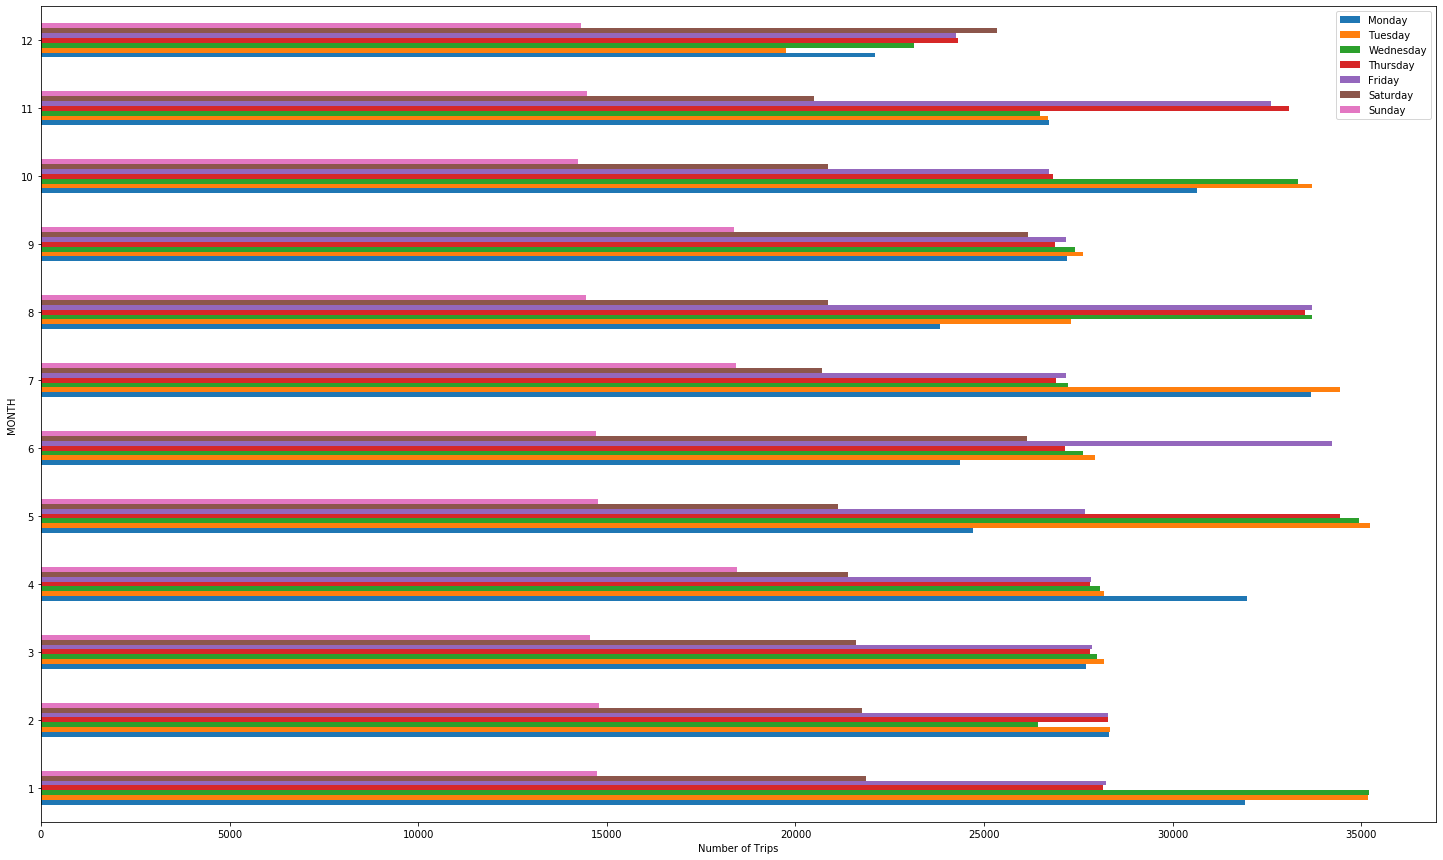

In [58]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', "Saturday", 'Sunday']

fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel('Number of Trips')
ax.set_ylabel('Month')
df.groupby(['MONTH','DAYOFWEEK'])['TRIPID'].count().unstack().plot(kind='barh', figsize=(25,15), ax=ax).legend(days)

### Add Exploratory Feature: Hour of Day Departure Time

In [59]:
df.head(5)

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,ACTUAL_TRIP_DURATION,DAYOFWEEK,MONTH
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,2924.0,2,2
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,NaN,2,2
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,4247.0,2,2
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,4020.0,2,2
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,3074.0,2,2


In [60]:
# make hourly bins for exploratory temporal categorisation

max_actual_dept = df.ACTUALTIME_DEP.max()
bins = []
x = 0
while x <= max_actual_dept:
    bins.append(x)
    x+=3600
    
len(bins)

27

In [61]:
# make labels exploratory temporal categorisation

labels = ['00:00-01:00',
          '01:00-02:00',
          '02:00-03:00',
          '03:00-04:00',
          '04:00-05:00',
          '05:00-06:00',
          '06:00-07:00',
          '07:00-08:00',
          '08:00-09:00',
          '09:00-10:00',
          '10:00-11:00',
          '11:00-12:00',
          '12:00-13:00',
          '13:00-14:00',
          '14:00-15:00',
          '15:00-16:00',
          '16:00-17:00',
          '17:00-18:00',
          '18:00-19:00',
          '19:00-20:00',
          '20:00-21:00',
          '21:00-22:00',
          '22:00-23:00',
          '23:00-00:00',
          '+1-00:00-01:00',
          '+1-01:00-02:00'
]

# make hour-categories

df['HOURRANGE_DEPARTURE'] = pd.cut(df.ACTUALTIME_DEP, bins=bins, labels=labels)

<br>

Test if departure time in seconds falls into the range correctly

<br>

In [62]:
df.loc[(df.HOURRANGE_DEPARTURE == '06:00-07:00')].head(1)

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,ACTUAL_TRIP_DURATION,DAYOFWEEK,MONTH,HOURRANGE_DEPARTURE
20,2018-02-07,6262164,46A,46A_74,1,28877,24480,29657.0,24697.0,4960.0,2,2,06:00-07:00


In [63]:
df.loc[(df.HOURRANGE_DEPARTURE == '06:00-07:00')].head(1)['ACTUALTIME_DEP'].values[0] / 60 / 60

6.860277777777778

<br>

Test again

<br>

In [64]:
df.loc[(df.HOURRANGE_DEPARTURE >'23:00-00:00')].head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,ACTUAL_TRIP_DURATION,DAYOFWEEK,MONTH,HOURRANGE_DEPARTURE
2341,2018-03-16,6398188,69,69_30,2,88571,86700,88866.0,87199.0,1667.0,4,3,+1-00:00-01:00
5986,2018-10-10,8029591,68,68_66,2,89100,87300,90142.0,87363.0,2779.0,2,10,+1-00:00-01:00
6038,2018-10-10,8017070,33,33_73,2,89820,85800,NaN,86813.0,NaN,2,10,+1-00:00-01:00
6097,2018-10-10,8025106,65,65_75,2,91024,87300,90404.0,87293.0,3111.0,2,10,+1-00:00-01:00
7147,2018-04-11,6620098,65,65_75,2,90870,87300,90725.0,87271.0,3454.0,2,4,+1-00:00-01:00


In [65]:
df.loc[(df.HOURRANGE_DEPARTURE >'23:00-00:00')].head().iloc[0,:]

DAYOFSERVICE            2018-03-16 00:00:00
TRIPID                              6398188
LINEID                                   69
ROUTEID                               69_30
DIRECTION                                 2
PLANNEDTIME_ARR                       88571
PLANNEDTIME_DEP                       86700
ACTUALTIME_ARR                        88866
ACTUALTIME_DEP                        87199
ACTUAL_TRIP_DURATION                   1667
DAYOFWEEK                                 4
MONTH                                     3
HOURRANGE_DEPARTURE          +1-00:00-01:00
Name: 2341, dtype: object

In [66]:
df.loc[(df.HOURRANGE_DEPARTURE >'23:00-00:00')].head().iloc[0,:]['ACTUALTIME_DEP'] / 60 / 60


24.221944444444443

<br>

Test again

<br>

In [67]:
df.loc[(df.HOURRANGE_DEPARTURE >'23:00-00:00')].head().iloc[1,:]

DAYOFSERVICE            2018-10-10 00:00:00
TRIPID                              8029591
LINEID                                   68
ROUTEID                               68_66
DIRECTION                                 2
PLANNEDTIME_ARR                       89100
PLANNEDTIME_DEP                       87300
ACTUALTIME_ARR                        90142
ACTUALTIME_DEP                        87363
ACTUAL_TRIP_DURATION                   2779
DAYOFWEEK                                 2
MONTH                                    10
HOURRANGE_DEPARTURE          +1-00:00-01:00
Name: 5986, dtype: object

In [68]:
df.loc[(df.HOURRANGE_DEPARTURE >'23:00-00:00')].head().iloc[1,:]['ACTUALTIME_DEP'] / 60 / 60

24.2675

TEST EXTREME

In [69]:
df.loc[(df.HOURRANGE_DEPARTURE > '+1-00:00-01:00')].head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,ACTUAL_TRIP_DURATION,DAYOFWEEK,MONTH,HOURRANGE_DEPARTURE


In [70]:
# find unique line, route, direction combinations with the hour range as added info

df.loc[df.LINEID == '145', ['DAYOFSERVICE', 'LINEID', 'ROUTEID',\
        'DIRECTION', 'ACTUALTIME_DEP', 'HOURRANGE_DEPARTURE']].drop_duplicates(subset=['LINEID', 'ROUTEID', 'DIRECTION'])

,DAYOFSERVICE,LINEID,ROUTEID,DIRECTION,ACTUALTIME_DEP,HOURRANGE_DEPARTURE
149,2018-02-18,145,145_102,1,52807.0,14:00-15:00
242,2018-03-11,145,145_105,2,NaN,NaN
1206,2018-03-16,145,145_91,2,30608.0,08:00-09:00
4206,2018-04-11,145,145_104,1,58448.0,16:00-17:00
7822,2018-06-22,145,145_99,1,57622.0,16:00-17:00
8646,2018-03-11,145,145_106,2,84039.0,23:00-00:00
8780,2018-09-20,145,145_93,2,27309.0,07:00-08:00
9523,2018-10-10,145,145_95,1,32973.0,09:00-10:00
10992,2018-07-09,145,145_86,2,NaN,NaN
11013,2018-07-09,145,145_87,2,57063.0,15:00-16:00


In [71]:
len(df.loc[df.LINEID == '145', ['DAYOFSERVICE', 'LINEID', 'ROUTEID',\
        'DIRECTION', 'HOURRANGE_DEPARTURE']].drop_duplicates(subset=['LINEID', 'ROUTEID', 'DIRECTION']))

15

In [71]:
len(df.loc[df.LINEID == '145', ['DAYOFSERVICE', 'LINEID', 'ROUTEID',\
        'DIRECTION', 'HOURRANGE_DEPARTURE']].drop_duplicates(subset=['LINEID', 'ROUTEID', 'DIRECTION']).loc[df.DIRECTION == 2])

9

From GTFS data (google transit notebook §4.1), we can confirm that the variation in ROUTEID coincides with variation in "route" shape

# Export this version of dataset

In [72]:
df.to_feather('/tmp/ssh_mount/rt_trips/230719_trips.feather')

# Export Line145 for Test Modelling

In [80]:
df_145_trips = df.loc[df.LINEID == '145', :]

In [81]:
df_145_trips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,ACTUAL_TRIP_DURATION,DAYOFWEEK,MONTH,HOURRANGE_DEPARTURE
149,2018-02-18,6263611,145,145_102,1,57297,52800,57733.0,52807.0,4926.0,6,2,14:00-15:00
150,2018-02-18,6267386,145,145_102,1,58497,54000,58711.0,53932.0,4779.0,6,2,14:00-15:00
151,2018-02-18,6265005,145,145_102,1,59697,55200,60354.0,55198.0,5156.0,6,2,15:00-16:00
171,2018-03-16,6398012,145,145_102,1,59653,54600,60906.0,54684.0,6222.0,4,3,15:00-16:00
242,2018-03-11,6389383,145,145_105,2,34920,31200,35764.0,NaN,NaN,6,3,NaN


In [82]:
df_145_trips.reset_index(drop=True, inplace=True)

In [83]:
df_145_trips.head(2)

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,ACTUAL_TRIP_DURATION,DAYOFWEEK,MONTH,HOURRANGE_DEPARTURE
0,2018-02-18,6263611,145,145_102,1,57297,52800,57733.0,52807.0,4926.0,6,2,14:00-15:00
1,2018-02-18,6267386,145,145_102,1,58497,54000,58711.0,53932.0,4779.0,6,2,14:00-15:00


In [77]:
df_145_trips.to_feather('/tmp/ssh_mount/L145_trial/df_145_trips.feather')

In [84]:
df_145_trips.shape[0]

62730

In [85]:
# the number of duplicated trip ids: out of interest

df_145_trips.TRIPID.count() - df_145_trips.TRIPID.drop_duplicates().count()

45029

In [259]:
df_145_trip_ids = df_145_trips.TRIPID.drop_duplicates().tolist()

In [ ]:
len(df)

In [262]:
df_145_trip_ids

[6263611,
 6267386,
 6265005,
 6398012,
 6389383,
 6388460,
 6390315,
 7772930,
 7757568,
 7764777,
 7768537,
 7772452,
 7105066,
 7102074,
 7029096,
 7029168,
 7029229,
 7029327,
 7029375,
 6394313,
 6400870,
 7767924,
 7105732,
 7102072,
 7112539,
 7029259,
 7029260,
 7029273,
 7029277,
 7029297,
 7029300,
 7029302,
 7029304,
 7029313,
 7029326,
 7029342,
 7029344,
 7029345,
 7029368,
 7029370,
 7029374,
 7029376,
 7029403,
 7115273,
 7115504,
 6275475,
 6267391,
 6263616,
 6268080,
 6265010,
 6275845,
 8016118,
 8022532,
 8024044,
 8016840,
 8016348,
 8018493,
 6618310,
 6623990,
 6619984,
 6622023,
 6628614,
 6625487,
 6615681,
 6625071,
 6621042,
 6616442,
 7771014,
 7109765,
 7109780,
 7110079,
 7105069,
 7029377,
 7029382,
 7100022,
 7110640,
 7099809,
 6272233,
 6272698,
 6272795,
 6272797,
 6273199,
 6273200,
 6273204,
 6264985,
 6272230,
 6273201,
 6275472,
 6275842,
 6272702,
 6619983,
 6623991,
 6618309,
 6615682,
 6614681,
 6628615,
 6618311,
 6626286,
 6625486,
 6625072,


In [263]:
with open('/tmp/ssh_mount/L145_trial/df_145_trip_ids.csv', 'w') as my_file:
    writer = csv.writer(my_file)
    writer.writerow(df_145_trip_ids)
    

# REIMPORT FOR FURTHER INSIGHTS

In [3]:
df = pd.read_feather('/tmp/ssh_mount/rt_trips/230719_trips.feather')

ArrowIOError: Failed to open local file: /tmp/ssh_mount/rt_trips/230719_trips.feather , error: No such file or directory

In [5]:
df.head(2)

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,ACTUAL_TRIP_DURATION,DAYOFWEEK,MONTH,HOURRANGE_DEPARTURE
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,2924.0,2,2,23:00-00:00
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,NaN,2,2,NaN


In [6]:
df.dtypes

DAYOFSERVICE            datetime64[ns]
TRIPID                        category
LINEID                        category
ROUTEID                       category
DIRECTION                     category
PLANNEDTIME_ARR                  int32
PLANNEDTIME_DEP                  int32
ACTUALTIME_ARR                 float32
ACTUALTIME_DEP                 float32
ACTUAL_TRIP_DURATION           float32
DAYOFWEEK                        int64
MONTH                            int64
HOURRANGE_DEPARTURE           category
dtype: object

In [7]:
df.LINEID = df.LINEID.astype('str')

In [9]:
# find where line id is nighttime

lineids = df.LINEID.unique().tolist()

In [15]:
night_services = []

for line in lineids:
    if line[-1] == 'N':
        night_services.append(line)

In [16]:
night_services

[]

In [ ]:
# inspect outlier beyond 95th percentile

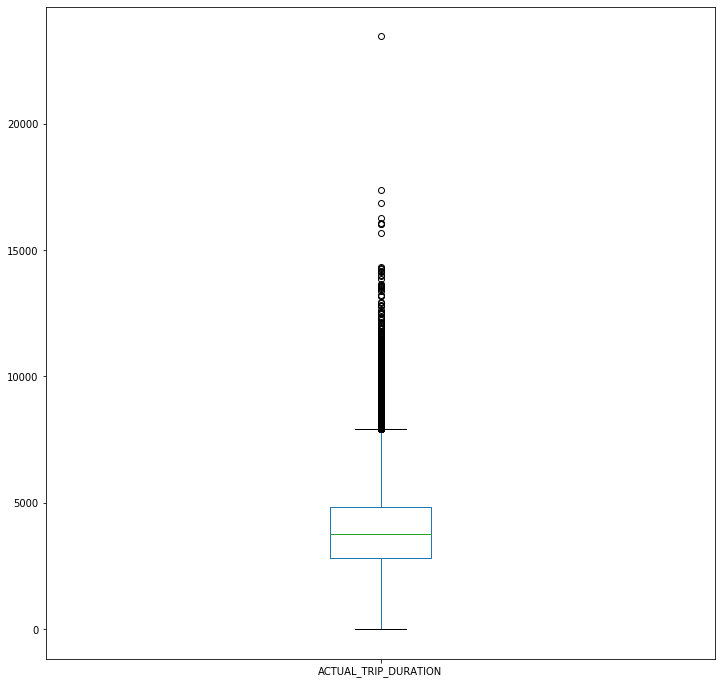

In [23]:
df.loc[df.ACTUAL_TRIP_DURATION > 0]['ACTUAL_TRIP_DURATION'].plot(kind='box', figsize=(12,12))

In [39]:
temp = df[df.ACTUAL_TRIP_DURATION > 0]

In [40]:
temp.ACTUAL_TRIP_DURATION.quantile(0.95)

6312.0

In [35]:
  temp.drop(temp[temp.ACTUAL_TRIP_DURATION < 2750].index, inplace=True)

/Users/davidodwyer/anaconda3/envs/analytics/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


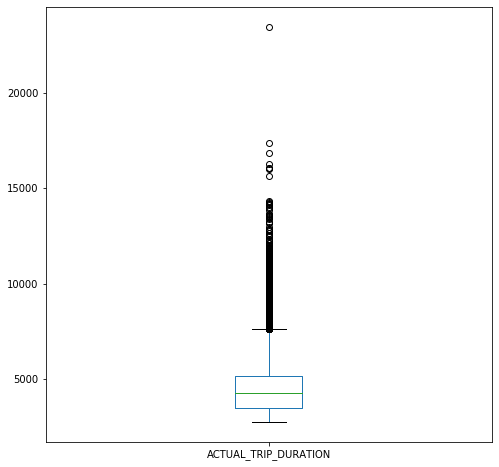

In [36]:
temp.ACTUAL_TRIP_DURATION.plot(kind='box', figsize=(8,8))

## PLANNED MAX TRAVEL TIMES FOR EACH LINE

In [5]:
df = pd.read_feather('/tmp/ssh_mount/data/dataframes/230719_trips.feather')

In [6]:
df.head(1)

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,ACTUAL_TRIP_DURATION,DAYOFWEEK,MONTH,HOURRANGE_DEPARTURE
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,2924.0,2,2,23:00-00:00


In [8]:
df_ = df[['LINEID', 'PLANNEDTIME_ARR', 'PLANNEDTIME_DEP','ACTUAL_TRIP_DURATION']]

In [10]:
del df

In [14]:
df_.drop_duplicates(inplace=True, keep='first')

In [15]:
# check for rows where departure times is later than arrival

df_.loc[df_.PLANNEDTIME_ARR < df_.PLANNEDTIME_DEP]

,LINEID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUAL_TRIP_DURATION


In [16]:
# create feature – trip duration – for exploration

df_['PLANNED_TRIP_DURATION'] = df_.PLANNEDTIME_ARR - df_.PLANNEDTIME_DEP

In [18]:
df_.head()

,LINEID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUAL_TRIP_DURATION,PLANNED_TRIP_DURATION
0,68,87245,84600,2924.0,2645
1,25B,30517,26460,NaN,4057
2,45A,35512,32100,4247.0,3412
3,25A,57261,54420,4020.0,2841
4,14,85383,81600,3074.0,3783


In [19]:
df_.dropna(inplace=True, axis=0)

In [21]:
df_.loc[df_.LINEID == '68']

,LINEID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUAL_TRIP_DURATION,PLANNED_TRIP_DURATION
0,68,87245,84600,2924.0,2645
78,68,43305,40200,2785.0,3105
570,68,60472,55800,4104.0,4672
593,68,57296,52200,4251.0,5096
594,68,50761,46800,3823.0,3961
596,68,58091,54000,4458.0,4091
597,68,83405,80700,3380.0,2705
638,68,27106,23100,4029.0,4006
783,68,70915,67500,3447.0,3415
784,68,75415,72000,3537.0,3415


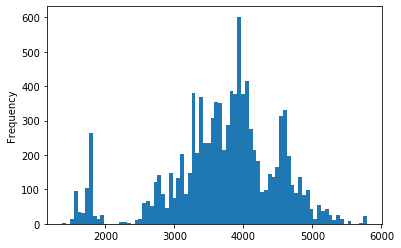

In [23]:
# plot travel time distributions

df_.loc[df_.LINEID == '68', 'PLANNED_TRIP_DURATION'].\
plot(kind='hist', bins=80)

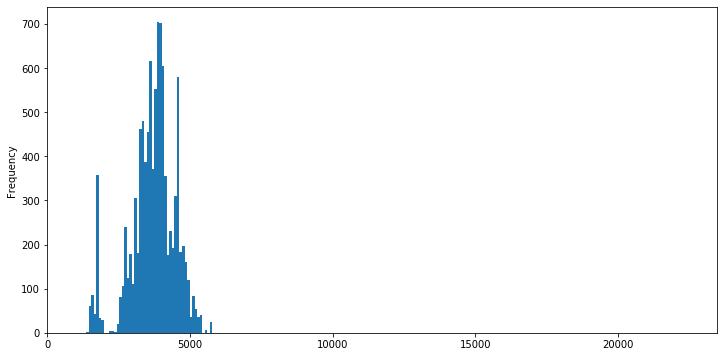

In [32]:
# plot travel time distributions

plt.xlim(0, df_.ACTUAL_TRIP_DURATION.max())
df_.loc[df_.LINEID == '68', 'PLANNED_TRIP_DURATION'].\
plot(kind='hist', bins=50, figsize=(12,6))

In [40]:
# find maximum travel time

df_.loc[df_.LINEID == '68', 'PLANNED_TRIP_DURATION'].max()

5786

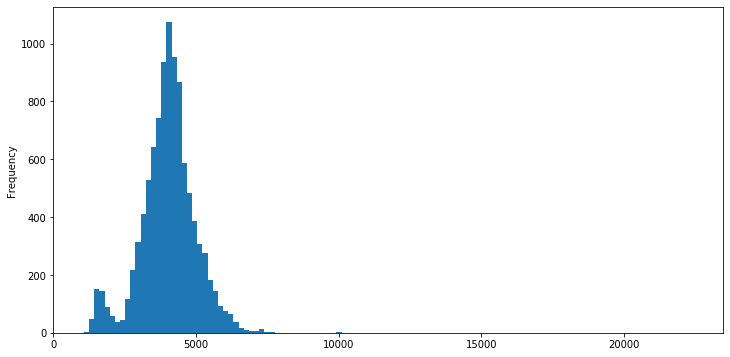

In [33]:
plt.xlim(0, df_.ACTUAL_TRIP_DURATION.max())
df_.loc[df_.LINEID == '68', 'ACTUAL_TRIP_DURATION'].\
plot(kind='hist', bins=50, figsize=(12,6))

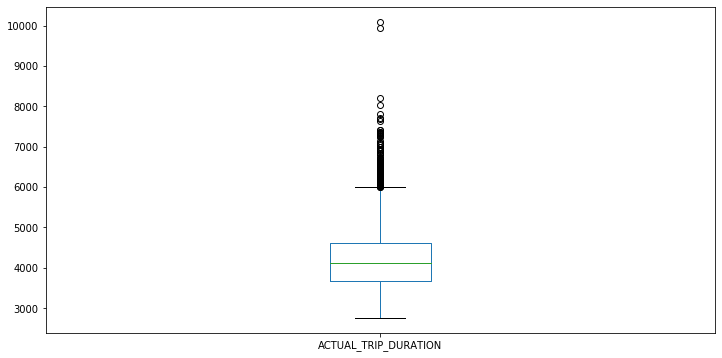

In [35]:
df_.loc[df_.LINEID == '68', 'ACTUAL_TRIP_DURATION'].\
loc[df_.ACTUAL_TRIP_DURATION > 2750].plot(kind='box', figsize=(12,6))

In [36]:
# the ~max value below outlier region

df_.loc[df_.LINEID == '68', 'ACTUAL_TRIP_DURATION'].\
loc[df_.ACTUAL_TRIP_DURATION > 2750].quantile(.99)

6320.759999999995

In [71]:
# same, varying the outlier threshold

df_.loc[df_.LINEID == '68', 'ACTUAL_TRIP_DURATION'].\
loc[df_.ACTUAL_TRIP_DURATION > 2750].quantile(.9987)

7347.368000000004

In [72]:
# number of trips above revised outlier threshold

df_.loc[df_.LINEID == '68', 'ACTUAL_TRIP_DURATION'].\
loc[df_.ACTUAL_TRIP_DURATION > 7347].count()

13

The difference between the maximum planned journey time and the 99th percentile actual journey time is 8.9min.

In [37]:
# number of actual trip duration values in ~outlier region

df_.loc[df_.LINEID == '68', 'ACTUAL_TRIP_DURATION'].\
loc[df_.ACTUAL_TRIP_DURATION > 6320].count()

94

In [38]:
# number of actual trip duration values above the negative outlier region

df_.loc[df_.LINEID == '68', 'ACTUAL_TRIP_DURATION'].\
loc[df_.ACTUAL_TRIP_DURATION > 2750].count()

9329

1% of actual journey times are above the 99th percentile.

In [62]:
df_.loc[df_.LINEID == '68', 'ACTUAL_TRIP_DURATION'].\
loc[df_.ACTUAL_TRIP_DURATION > 6320].index

Int64Index([  73004,  140327,  176587,  189808,  211326,  260496,  266487,
             275917,  285433,  305820,  313077,  330494,  402496,  410707,
             451323,  455393,  475813,  478347,  488203,  493813,  529088,
             530309,  545672,  571957,  582306,  592526,  604295,  611124,
             645888,  650097,  653219,  653220,  692545,  726047,  753161,
             758378,  769640,  801014,  825058,  829014,  837120,  857257,
             875691,  904286,  965030, 1007509, 1029144, 1047708, 1057077,
            1088525, 1185899, 1223630, 1246325, 1286582, 1305749, 1307064,
            1315064, 1354983, 1357240, 1367824, 1371329, 1429367, 1440093,
            1479679, 1481579, 1514995, 1552339, 1562302, 1566873, 1567323,
            1586100, 1591515, 1636254, 1683841, 1686033, 1704091, 1715184,
            1717371, 1781731, 1814069, 1853001, 1894178, 1897518, 1897544,
            1917017, 1954002, 1959503, 1983503, 1996599, 2048435, 2090316,
            2133707, 2160

Z-Score is alternative way to determine outlier regions. Rather than working on percentiles, it represents the number of standard deviations from the mean.

In [54]:
# calculate z-scores

from scipy import stats


Calculate Z-Scores for each values in the sample. Passing Trip Duration values for Line 68 as example

In [64]:
z = np.abs(stats.zscore((df_.loc[(df_.LINEID == '68') &\
                    (df_.ACTUAL_TRIP_DURATION > 2750), 'ACTUAL_TRIP_DURATION'])))

In [65]:
# number of values beyond 3 standard deviations

print(len(np.where(z > 3)[0]))

58


In [66]:
# row numbers of values beyond three standard deviations

outliers = np.where(z > 3)[0]
outliers

array([ 861, 1073, 1099, 1318, 1422, 1716, 1763, 1935, 1960, 2045, 2329,
       2444, 2481, 2531, 2621, 2772, 2794, 2798, 2799, 2980, 3156, 3288,
       3478, 3611, 3656, 3822, 4225, 4584, 4753, 5351, 5728, 5736, 5945,
       5964, 5999, 6021, 6315, 6750, 6788, 6800, 6804, 6919, 7259, 7263,
       7358, 7402, 7418, 7652, 7936, 8101, 8102, 8458, 8521, 8746, 8918,
       9118, 9237, 9282])

In [58]:
df_.iloc[861]

LINEID                     17A
PLANNEDTIME_ARR          59894
PLANNEDTIME_DEP          55200
ACTUAL_TRIP_DURATION      4863
PLANNED_TRIP_DURATION     4694
Name: 985, dtype: object

In [57]:
# print the outlier values

for outlier in outliers:
    print(df_.iloc[outlier]['ACTUAL_TRIP_DURATION'])

4863.0
2594.0
1505.0
2636.0
2772.0
2978.0
6237.0
4282.0
4596.0
5097.0
1672.0
2379.0
2571.0
3975.0
3850.0
5693.0
4505.0
2435.0
3111.0
3620.0
1774.0
3823.0
1849.0
6060.0
2164.0
2117.0
3131.0
3651.0
3989.0
3455.0
3009.0
5594.0
1301.0
4741.0
3337.0
4187.0
2929.0
6508.0
5841.0
5080.0
4560.0
4033.0
5608.0
1585.0
2476.0
1324.0
2468.0
7300.0
2576.0
4065.0
4019.0
2768.0
5068.0
3598.0
3401.0
5227.0
2778.0
2562.0
